In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn. preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Importing data set

fraud=pd.read_csv("/content/Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
# Checking information of data
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [ ]:
# Checking null values if any

fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

**Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

In [ ]:
# Adding Tax column per above statment by list comprehension

fraud["Tax"]=["Risky" if i<= 30000 else "Good" for i in fraud["Taxable.Income"]]

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [ ]:
# We can see undergrad and urban data as catagorical we will perform label encoding to conver into numeric

le=LabelEncoder()

fraud["Undergrad"]=le.fit_transform(fraud["Undergrad"])
fraud["Urban"]=le.fit_transform(fraud["Urban"])
fraud["Marital.Status"]=le.fit_transform(fraud["Marital.Status"])
fraud["Tax"]=le.fit_transform(fraud["Tax"])

In [ ]:
fraud["Tax"].value_counts()

0    476
1    124
Name: Tax, dtype: int64

# **Assuming Tax, Risky=0 and others are Good=1**

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [ ]:
# Spliting data into x and y variable

x=fraud.iloc[:,[0,1,3,4,5]]
y=fraud.iloc[:,6]

In [ ]:
y.value_counts()

0    476
1    124
Name: Tax, dtype: int64

**Model Building**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
# Model building with DecisionTree Classifier

model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(xtrain,ytrain)

pred=model.predict(xtest)

[Text(0.5416666666666666, 0.875, 'x[3] <= 24.5\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]'),
 Text(0.3333333333333333, 0.625, 'x[3] <= 6.5\nentropy = 0.774\nsamples = 369\nvalue = [285, 84]'),
 Text(0.16666666666666666, 0.375, 'x[4] <= 0.5\nentropy = 0.607\nsamples = 94\nvalue = [80, 14]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.391\nsamples = 39\nvalue = [36, 3]'),
 Text(0.25, 0.125, 'entropy = 0.722\nsamples = 55\nvalue = [44, 11]'),
 Text(0.5, 0.375, 'x[2] <= 39943.0\nentropy = 0.818\nsamples = 275\nvalue = [205, 70]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.967\nsamples = 28\nvalue = [17, 11]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.793\nsamples = 247\nvalue = [188, 59]'),
 Text(0.75, 0.625, 'x[3] <= 25.5\nentropy = 0.618\nsamples = 111\nvalue = [94, 17]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.8333333333333334, 0.375, 'x[2] <= 34266.5\nentropy = 0.678\nsamples = 95\nvalue = [78, 17]'),
 Text(0.75, 

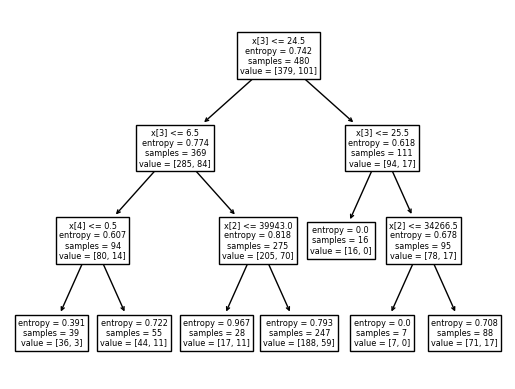

In [ ]:
# Ploting the DecisonTree

tree.plot_tree(model)

[Text(0.5416666666666666, 0.875, 'City.Population <= 24.5\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]\nclass = 0'),
 Text(0.3333333333333333, 0.625, 'City.Population <= 6.5\nentropy = 0.774\nsamples = 369\nvalue = [285, 84]\nclass = 0'),
 Text(0.16666666666666666, 0.375, 'Work.Experience <= 0.5\nentropy = 0.607\nsamples = 94\nvalue = [80, 14]\nclass = 0'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.391\nsamples = 39\nvalue = [36, 3]\nclass = 0'),
 Text(0.25, 0.125, 'entropy = 0.722\nsamples = 55\nvalue = [44, 11]\nclass = 0'),
 Text(0.5, 0.375, 'Taxable.Income <= 39943.0\nentropy = 0.818\nsamples = 275\nvalue = [205, 70]\nclass = 0'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.967\nsamples = 28\nvalue = [17, 11]\nclass = 0'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.793\nsamples = 247\nvalue = [188, 59]\nclass = 0'),
 Text(0.75, 0.625, 'City.Population <= 25.5\nentropy = 0.618\nsamples = 111\nvalue = [94, 17]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'entropy =

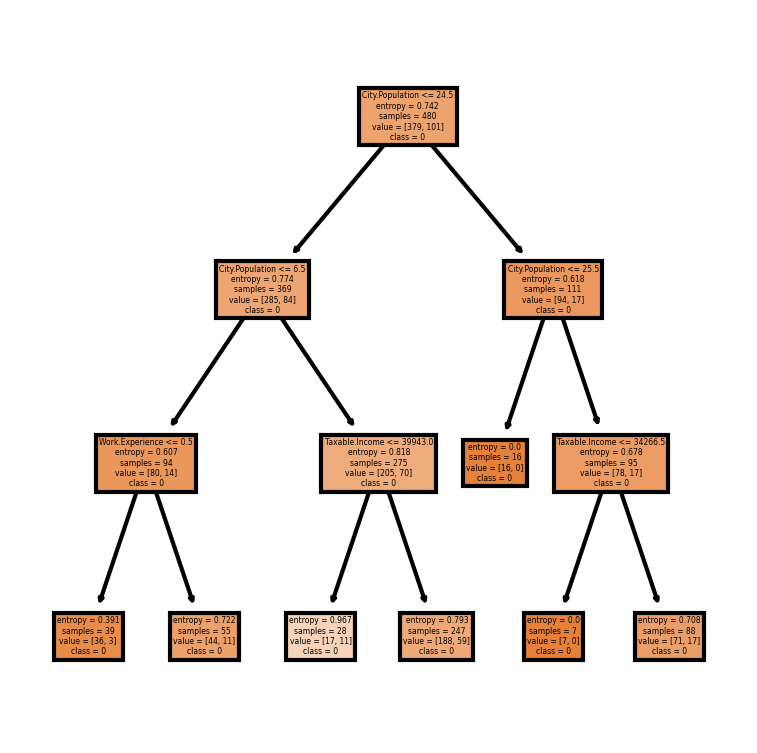

In [ ]:
# Assigning the function and class name to beter visualise the DecisionTree

fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience","Urban	"] # Feature names
cn=["0","1"]


figmaxes=plt.subplots(ncols=1,nrows=1,figsize=(3,3),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)


In [ ]:
# Accuracy
np.mean(pred==ytest)

0.8083333333333333

In [ ]:
# Accuracy can also be checked by
model.score(xtest,ytest)

0.8083333333333333

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [ ]:
model1=DecisionTreeClassifier(criterion="gini",max_depth=3)
model1.fit(xtrain,ytrain)

gpred=model.predict(xtest)

In [ ]:
np.mean(gpred==ytest)

0.8083333333333333

# **DecisionTree Reggressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model2=DecisionTreeRegressor()
model2.fit(xtrain,ytrain)

rpred=model.predict(xtest)

np.mean(ytest==rpred)

0.8083333333333333